In [1]:
import pandas as pd
import edhec_risk_kit as erk
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('use_inf_as_na', True)

In [2]:
fmi = erk.get_ffme_20_returns()

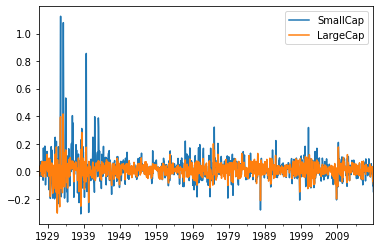

In [3]:
fmi.plot()

In [4]:
fmi.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [5]:
fmi.std()

SmallCap    0.097197
LargeCap    0.056325
dtype: float64

## Annualized return

In [6]:
n_months = fmi.shape[0]
annualized_return = (fmi + 1).prod() ** (12/n_months) - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

## Annualized Volatility

In [7]:
fmi.std() * np.sqrt(12)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

## Annualized Volatility in period of 1999-2015

In [8]:
fmi_sub = fmi["1999-01":"2015-12"]
fmi_sub.shape[0]

204

In [9]:
fmi_sub.std() * np.sqrt(12)

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

## Annualized Return over the period of 1999-2015

In [10]:
n_months_sub = fmi_sub.shape[0]
annualized_return = (fmi_sub + 1).prod() ** (12/n_months_sub) - 1
annualized_return

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

## Drawdown

In [11]:
erk.drawdown(fmi_sub["SmallCap"]).min()

Wealth      1034.189842
Peaks       1111.400000
Drawdown      -0.624809
dtype: float64

In [12]:
erk.drawdown(fmi_sub["SmallCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [13]:
erk.drawdown(fmi_sub["SmallCap"])["Drawdown"]["2009-02"]

-0.6248092431236988

In [14]:
erk.drawdown(fmi_sub["LargeCap"]).min()

Wealth       721.706638
Peaks       1015.300000
Drawdown      -0.552735
dtype: float64

In [15]:
erk.drawdown(fmi_sub["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

# Semideviation (Q13)

In [16]:
hfi = erk.get_hfi_returns()
hfi_sub = hfi["2009-01":"2018-12"]
hfi_sub[hfi_sub<0].std(ddof=0).idxmin()

'Fixed Income Arbitrage'

In [17]:
erk.skewness(hfi["2009-01":]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [18]:
erk.kurtosis(hfi["2000-01":"2018-12"]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64